In [3]:
from scipy.special import voigt_profile
from scipy.optimize import curve_fit
import scipy
import numpy as np
from glob import glob
from astropy.io import fits
import matplotlib.pyplot as plt

In [4]:
files = glob("data/*.fits")
images = [fits.getdata(f) for f in files]


In [5]:
def quantile_imshow(img,lower=0.1,upper=0.5,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

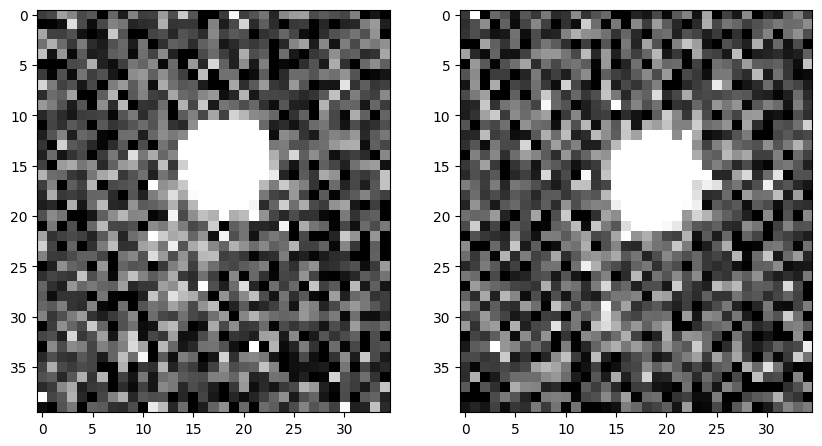

In [6]:
fig,ax = plt.subplots(ncols=2,figsize=(10,10))
for i,image1 in enumerate(images):
    plt.sca(ax[i])
    quantile_imshow(image1[410:450,85:120], cmap = 'gray', upper= 0.95)

In [7]:
sum_x1 = [image1[410:450,85:120].sum(axis=0) for image1 in images]
sum_y1 = [image1[410:450,85:120].sum(axis=1) for image1 in images]

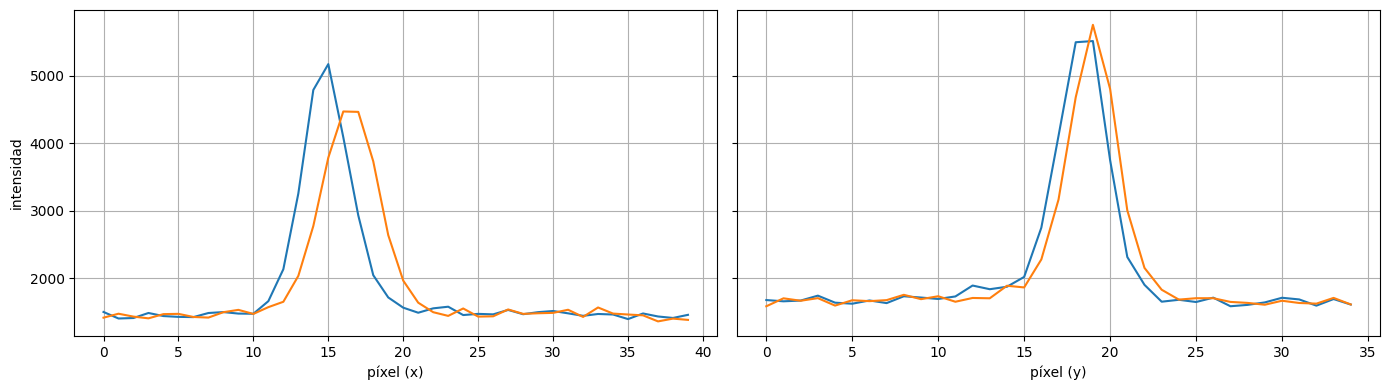

In [8]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4),sharey=True)

plt.sca(ax[0])
plt.plot(sum_y1[0])
plt.plot(sum_y1[1])
plt.xlabel("píxel (x)")
plt.ylabel("intensidad")
plt.grid()

plt.sca(ax[1])
plt.plot(sum_x1[0])
plt.plot(sum_x1[1])
plt.xlabel("píxel (y)")
plt.grid()

plt.tight_layout()

In [9]:
def voigt(data, b, c, A, s1, s2):
    return b - A * voigt_profile(data-c, s1,s2)

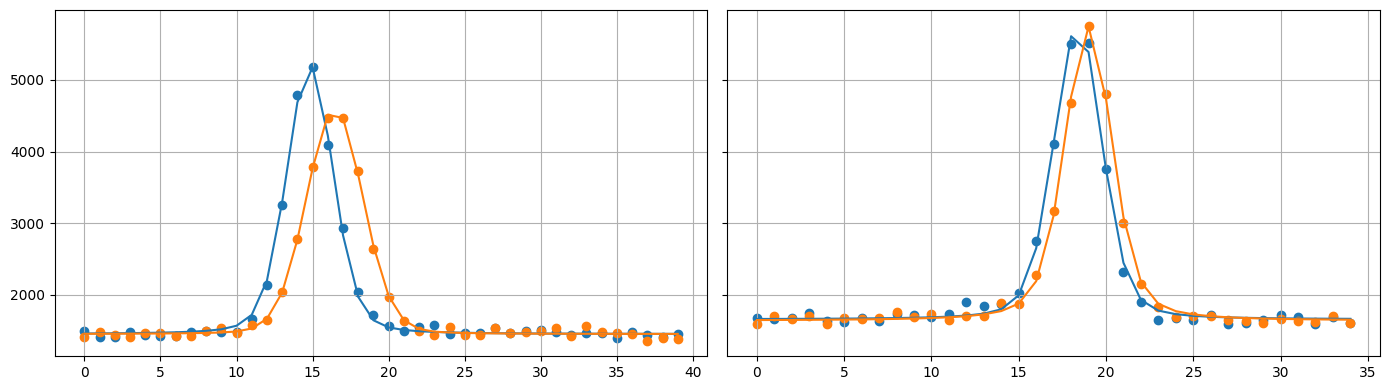

In [10]:
fig,ax = plt.subplots(ncols=2,figsize=(14,4),sharey=True)

data_pixel_y1 = np.arange(0, 40)

py1_0 = [1000, 15,1e5, 5,5]
param_y1_0, ince_y1_0 = curve_fit(voigt, data_pixel_y1, sum_y1[0], p0=py1_0)
py1_1 = [1000, 17,1e5, 5,3]
param_y1_1, ince_y1_1 = curve_fit(voigt, data_pixel_y1, sum_y1[1], p0=py1_1)

plt.sca(ax[0])
plt.scatter(data_pixel_y1, sum_y1[0])
plt.plot(data_pixel_y1, voigt(data_pixel_y1, *param_y1_0))
plt.scatter(data_pixel_y1, sum_y1[1])
plt.plot(data_pixel_y1, voigt(data_pixel_y1, *param_y1_1))

data_pixel_x1 = np.arange(0, 35)

px1_0 = [1000, 17,1e5, 3,3]
param_x1_0, ince_x1_0 = curve_fit(voigt, data_pixel_x1, sum_x1[0], p0=px1_0)
px1_1 = [1000, 18,1e5, 3,3]
param_x1_1, ince_x1_1 = curve_fit(voigt, data_pixel_x1, sum_x1[1], p0=px1_1)
plt.grid()

plt.sca(ax[1])
plt.scatter(data_pixel_x1, sum_x1[0])
plt.plot(data_pixel_x1, voigt(data_pixel_x1, *param_x1_0))
plt.scatter(data_pixel_x1, sum_x1[1])
plt.plot(data_pixel_x1, voigt(data_pixel_x1, *param_x1_1))
plt.grid()

plt.tight_layout()

In [17]:
imagen1_shift = scipy.ndimage.shift(images[1][410:450,85:120], (param_x1_0[1]-param_x1_1[1], param_y1_0[1]-param_y1_1[1]))


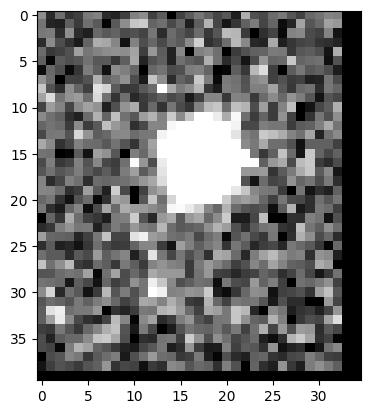

In [18]:
quantile_imshow(imagen1_shift, cmap= "gray", upper=0.95)

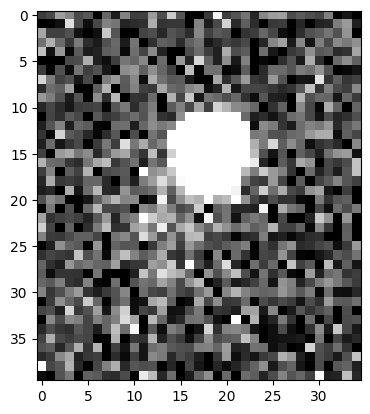

In [19]:
quantile_imshow(images[0][410:450,85:120], cmap= "gray", upper=0.95)

In [20]:
resta = imagen1_shift - images[0][410:450,85:120] 

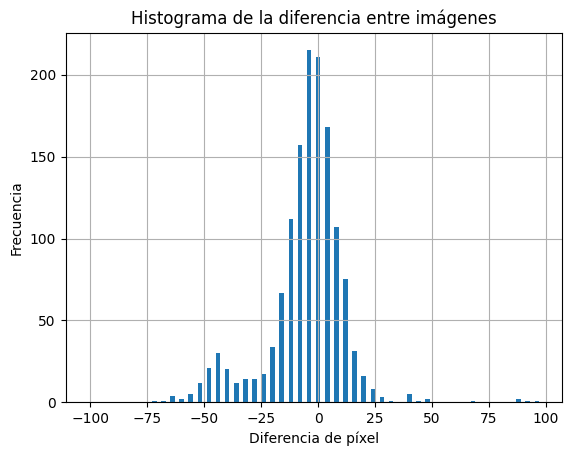

In [21]:
histograma = np.histogram(resta, bins=50, range=(-100, 100))[0]

bins = np.linspace(-100, 100, 51)

plt.bar(bins[:-1], histograma, width=2)
plt.xlabel('Diferencia de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma de la diferencia entre imágenes')
plt.grid()
plt.savefig("hist.jpeg")
plt.show()

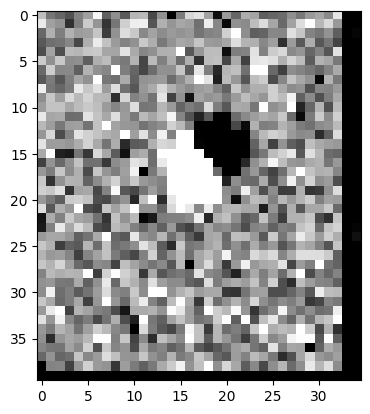

In [22]:
quantile_imshow(resta, cmap = "gray", upper = 0.95)
plt.savefig("quantile.jpeg")